In [1]:
import torch
import clip
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'program is running on {device}.')

program is running on cuda.


In [3]:
img_list = ['data/golden monkey.jpg',
            'data/peacock.jpg',
            'data/watermelon.jpg']

text_list = ['This is a dog.', 
             'There are three golden monkeys.',
             'A picture of a cat.',
             'A beautiful peacock is in the photo.',
             'Lying on the ground is a watermelon.']

In [4]:
model, preprocess = clip.load('ViT-B/32', device=device)

In [5]:
imgs = [preprocess(Image.open(img)) for img in img_list]
imgs = torch.stack(imgs, dim=0).to(device)

text = clip.tokenize(text_list).to(device)

In [6]:
with torch.no_grad():
    img_features = model.encode_image(imgs)
    text_features = model.encode_text(text)

    logits_per_img, logits_per_text = model(imgs, text)
    probs = logits_per_img.softmax(dim=-1).cpu().numpy()

print('Label probs:\n', probs)


c:\software\anaconda3\envs\py39\lib\site-packages\torch\nn\functional.py:5476: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)


Label probs:
 [[9.608e-05 1.000e+00 2.176e-05 3.397e-06 1.192e-06]
 [4.470e-05 8.941e-07 1.568e-05 1.000e+00 5.960e-08]
 [5.612e-04 1.192e-07 3.979e-04 9.060e-06 9.990e-01]]


In [7]:
print(img_features.shape)
print(text_features.shape)

torch.Size([3, 512])
torch.Size([5, 512])


In [8]:
img_features /= img_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)

print(img_features.shape)
print(text_features.shape)

torch.Size([3, 512])
torch.Size([5, 512])


In [9]:
similarity = text_features.cpu().numpy() @ img_features.cpu().numpy().T

In [10]:
print(similarity.shape)

(5, 3)


In [11]:
imgs_plt = [Image.open(img).convert('RGB') for img in img_list]

Text(0.5, 1.0, 'Cosine similarity between text and image features')

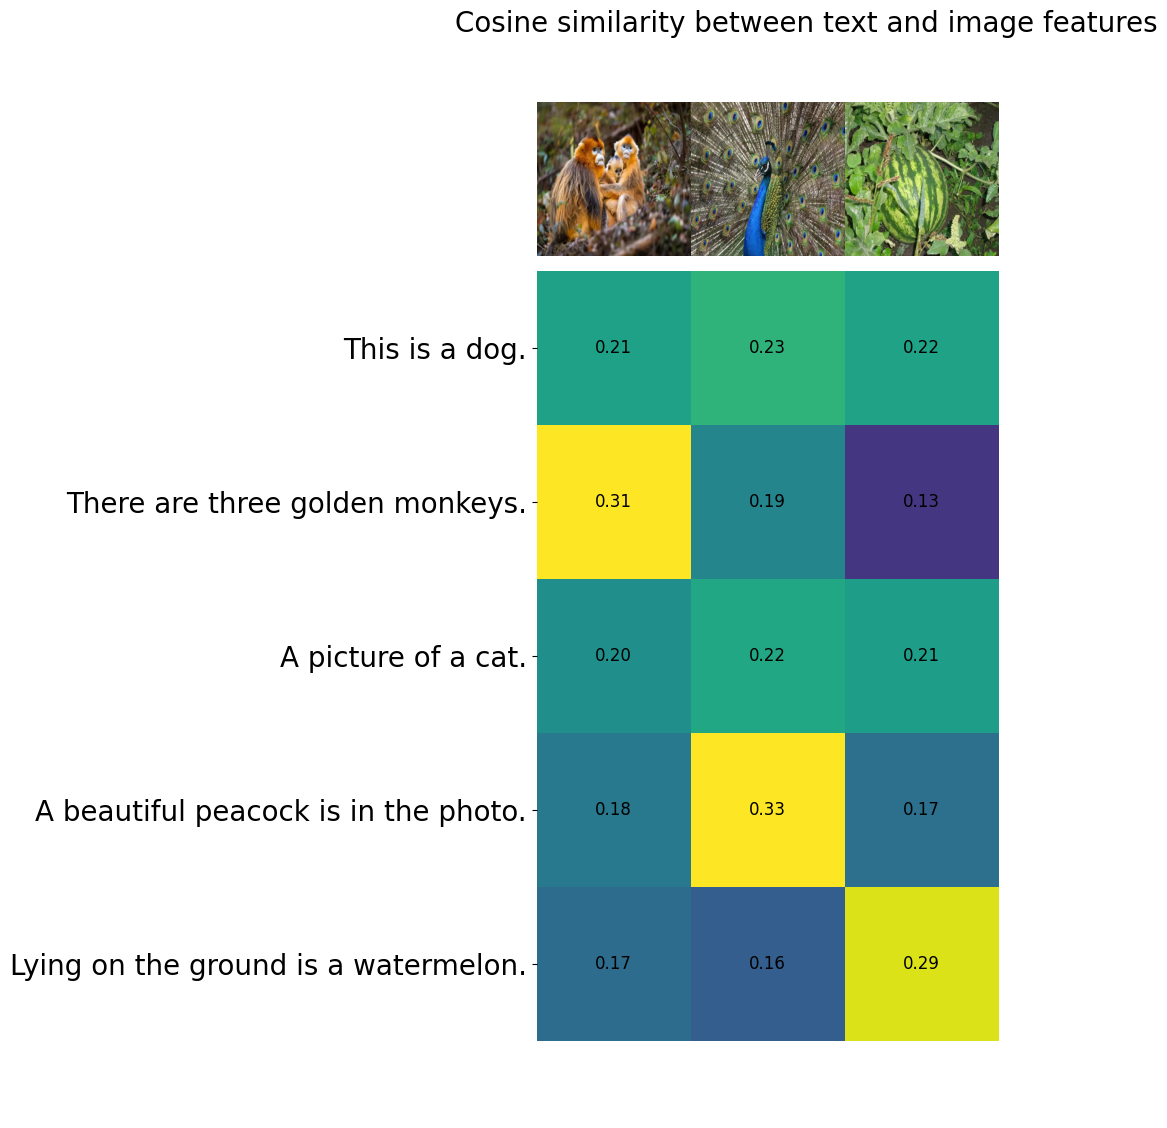

In [12]:
img_num = len(img_list)
text_num = len(text_list)

plt.figure(figsize=(20, 14))
plt.imshow(similarity, vmin=0.1, vmax=0.3)

plt.yticks(range(text_num), text_list, fontsize=20)
plt.xticks([])
for i, img in enumerate(imgs_plt):
    plt.imshow(img, extent=(i - 0.5, i + 0.5, -1.6, -0.6), origin="lower")

for x in range(similarity.shape[1]):
    for y in range(similarity.shape[0]):
        plt.text(x, y, f"{similarity[y, x]:.2f}", ha="center", va="center", size=12)

for side in ["left", "top", "right", "bottom"]:
    plt.gca().spines[side].set_visible(False)

plt.xlim([-0.5, img_num])
plt.ylim([text_num, -2])

plt.title("Cosine similarity between text and image features", size=20)